In [1]:
!pip install mplcursors --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mplcursors

from scipy.spatial.distance import cdist

# if run this file in colab, use %matplotlib inline instead
#%matplotlib inline
%matplotlib nbagg

### Implement Fuzzy C-Means

In [3]:
class FCMean:
    def __init__(self, n_cluster, max_it=200, m=1.25, esp=0.001):
        self.n_cluster = n_cluster
        self.m = m
        self.esp = esp
        self.max_it = max_it
    
    def fit(self, X):
        self.X = X
        
        # init random centers
        self.centers = [np.random.uniform(size=(self.n_cluster, X.shape[1]))]
        
        # loop
        for _ in range(self.max_it):
            
            # calc membership matrix             
            U = self.calc_membership_matrix(X)
            
            # calc new center
            new_centers = np.zeros((self.n_cluster, X.shape[1]))
            for k in range(self.n_cluster):
                d_k = U[:, k].reshape(-1, 1)
                d_k_pow = np.power(d_k, self.m)
                new_centers[k, :] = np.sum(d_k_pow * X, axis=0) / np.sum(d_k_pow)

            # stop condition
            if np.linalg.norm(new_centers - self.centers[-1]) < self.esp:
                print(f"Stop at it: {_}")
                break
                
            self.centers.append(new_centers)


    def calc_membership_matrix(self, x_inputs):
        # calc distance between each point and centers            
        dis = cdist(x_inputs, self.centers[-1], 'euclidean')

        # calc U matrix
        dis_pow = np.power(1.0 / dis, 1.0 / (self.m - 1))
        U = dis_pow / np.sum(dis_pow, axis=1, keepdims=True)
        return U
    
    def plot_result(self):
        labels = self.predict(self.X)
        
        fig, ax = plt.subplots()
        sc = ax.scatter(self.X[:, 0], self.X[:, 1], c=labels, alpha=0.6)
        
        fcm_centers = self.centers[-1]
        for k in range(self.n_cluster):
            k_th_center = fcm_centers[k]
            plt.scatter(k_th_center[0], k_th_center[1], s=500, marker='*',color=np.random.rand(3,), label=f'{k}')
        
        ax.legend()
        ax.set_title(f"Fuzzy C-Means with {self.n_cluster} cluster")
        
        # calc mebership matrix and display on hover         
        U = self.calc_membership_matrix(self.X)
        U = np.round(U, 3)
        cursor = mplcursors.cursor(sc, hover=True)
        cursor.connect("add", lambda sel: sel.annotation.set_text(U[sel.target.index]))
        
        #
        plt.show()
        
    
    def predict(self, input):
        dis = cdist(input, self.centers[-1])
        return np.argmin(dis, axis=1)


### Apply with Iris datasets

In [4]:
from sklearn import datasets

Stop at it: 17


<IPython.core.display.Javascript object>


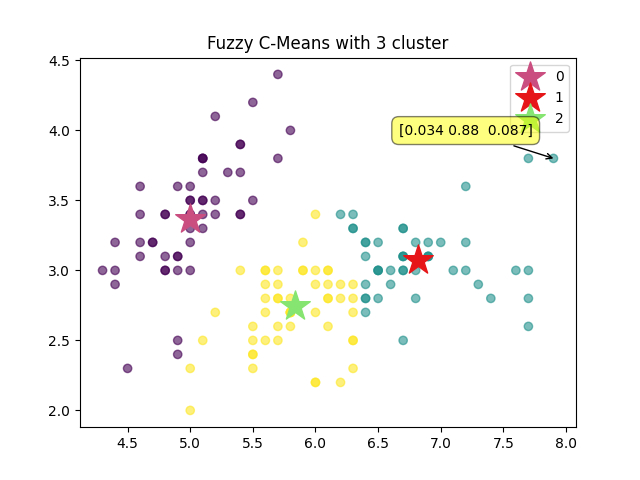

In [5]:
iris = datasets.load_iris().data
x_iris = iris[:, :2]

fcmean = FCMean(n_cluster=3)
fcmean.fit(x_iris)
fcmean.plot_result()